In [1]:
%load_ext autoreload
%autoreload 2

import os,sys
sys.path.append("../")
sys.path.append("/home/redne/pvnet/latentfusion/")

import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
import os
from pathlib import Path
import numpy as np
import torch
from torch.backends import cudnn

from latentfusion.datasets.bop import BOPDataset

In [21]:
#bop_dataset = "lm"
bop_dataset = "hb"
#bopdata_path = Path(f"/mnt/cvdatastore/bop/{bop_dataset}/")
#bopdata_path = Path(f"/mnt/bopq/bop/{bop_dataset}/")
bopdata_path = Path(f'/mnt/bop20hb/bop/{bop_dataset}/')
object_id = 1
frame = 0
input_scene_path = bopdata_path / f'train_pbr/{object_id:06d}'
input_scene_path

PosixPath('/mnt/bop20hb/bop/hb/train_pbr/000001')

In [22]:
input_dataset = BOPDataset(bopdata_path, input_scene_path, object_id=object_id, object_scale=None)

In [8]:
input_dataset.intrinsics[0]

tensor([[537.4799,   0.0000, 318.8965,   0.0000],
        [  0.0000, 536.1447, 238.3781,   0.0000],
        [  0.0000,   0.0000,   1.0000,   0.0000]])

In [10]:
from latentfusion.recon.inference import Observation
num_input_views = 8
input_obs = Observation.from_dataset(input_dataset, inds=input_dataset.sample_evenly(num_input_views))

In [17]:
from latentfusion.recon.inference import LatentFusionModel

CHECKPOINT = Path("/home/redne/pvnet/latentfusion/latentfusion-release.pth")
device = torch.device("cpu")
model = LatentFusionModel.from_checkpoint(CHECKPOINT, device)

import latentfusion.visualization as viz
from latentfusion.augment import gan_denormalize

2020-08-23 04:38.03 [info     ] loaded model                   [latentfusion.recon.inference] epoch=200 name=shapenet,no_mask_morph,fixed_eqlr,256,mask,depth,in_mask,mask_noise_p=0.25,sm=nearest,fuser=gru-branched_20200509_10h19m10s-branched_20200509_10h42m53s-branched_20200509_10h46m53s-branched_20200509_10h48m49s


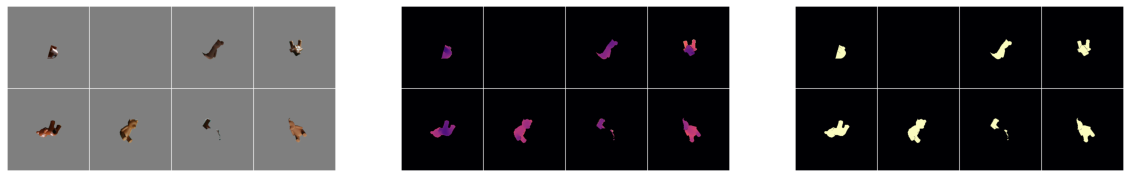

In [18]:
input_obs_pp = model.preprocess_observation(input_obs)
input_obs_pp_gt = model.preprocess_observation(input_obs)

plt.figure(figsize=(20, 10))
plt.subplot(131)
viz.show_batch(gan_denormalize(input_obs_pp.color), nrow=4)
plt.subplot(132)
viz.show_batch(viz.colorize_depth(input_obs_pp.depth), nrow=4)
plt.subplot(133)
viz.show_batch(viz.colorize_tensor(input_obs_pp.mask), nrow=4)